In [ ]:
# 21522211 - Phạm Duy Khánh - IS252.O22

**a) Đọc	bộ	dữ	liệu	train,	test	của	MNIST	từ	Keras**

In [6]:
from keras.datasets import mnist

# Đọc bộ dữ liệu train và test từ Keras
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**b) In	ra	kích	thước	của	tập	train,	test:**

In [7]:
# In ra kích thước của bộ dữ liệu
print("Kích thước của bộ dữ liệu train:")
print("Train images:", train_images.shape)
print("Train labels:", train_labels.shape)
print("\nKích thước của bộ dữ liệu test:")
print("Test images:", test_images.shape)
print("Test labels:", test_labels.shape)

Kích thước của bộ dữ liệu train:
Train images: (60000, 28, 28)
Train labels: (60000,)

Kích thước của bộ dữ liệu test:
Test images: (10000, 28, 28)
Test labels: (10000,)


**c) Chuẩn	hóa	các	giá	trị pixel	của	ảnh	về	đoạn	[0,1]**

In [9]:
# Chuẩn hóa giá trị pixel của ảnh về đoạn [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

**d) Định	nghĩa	hàm	create_model,	bao	gồm:**
- Model	là	Neural Network	tương	tự	như	câu	2
- Biên	 dịch	 mô	 hình	 sử	 dụng	 optimizer:	 adam;	 loss:
sparse_categorical_crossentropy;	metric:	accuracy

In [1]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam

def create_model():
    # Khởi tạo mô hình
    model = Sequential()

    # Thêm Flatten layer
    model.add(Flatten(input_shape=(28, 28)))

    # Thêm Dense layer
    model.add(Dense(128, activation='relu'))

    # Thêm Dropout layer để giảm overfitting
    model.add(Dropout(0.2))

    # Thêm Dense layer cho output
    model.add(Dense(10, activation='softmax'))

    # Biên dịch mô hình
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

**Huấn	luyện	mô	hình bằng	k-fold	cross	validation	(với	k=10).**

In [3]:
from sklearn.model_selection import KFold

# Định nghĩa số fold và khởi tạo KFold
n_splits = 10
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [4]:
# Khởi tạo mảng để lưu mô hình của từng fold
models = []

# Mảng để lưu kết quả accuracy và loss của từng fold
accuracy_per_fold = []
loss_per_fold = []

In [10]:
# Duyệt qua mỗi fold
for fold, (train_index, val_index) in enumerate(kfold.split(train_images)):
    print(f"Fold {fold+1}/{n_splits}")

    # Tạo mô hình
    model = create_model()

    # Lấy dữ liệu cho fold hiện tại
    X_train_fold, X_val_fold = train_images[train_index], train_images[val_index]
    y_train_fold, y_val_fold = train_labels[train_index], train_labels[val_index]

    # Huấn luyện mô hình
    history = model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=1)

    # Lưu mô hình vào mảng models
    models.append(model)

    # Tính và in ra accuracy và loss của fold
    loss, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Accuracy for fold {fold+1}: {accuracy}")
    print(f"Loss for fold {fold+1}: {loss}")

    # Lưu kết quả accuracy và loss của fold vào mảng
    accuracy_per_fold.append(accuracy)
    loss_per_fold.append(loss)

Fold 1/10
Epoch 1/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3095 - accuracy: 0.9106 - val_loss: 0.1397 - val_accuracy: 0.9598
Epoch 2/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1489 - accuracy: 0.9561 - val_loss: 0.1061 - val_accuracy: 0.9688
Epoch 3/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1122 - accuracy: 0.9659 - val_loss: 0.0922 - val_accuracy: 0.9737
Epoch 4/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0925 - accuracy: 0.9717 - val_loss: 0.0821 - val_accuracy: 0.9773
Epoch 5/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0792 - accuracy: 0.9757 - val_loss: 0.0803 - val_accuracy: 0.9780
Accuracy for fold 1: 0.9779999852180481
Loss for fold 1: 0.08030660450458527
Fold 2/10
Epoch 1/5
1688/1688 [==============================] - 7s 3ms/step - loss: 0.3117 - accuracy: 0.9082 - val_loss: 0.1602 - val_accuracy: 0.9552
Epoch 2/5
1688/1688 [========================

**Tính và in ra Mean Accuracy, Standard deviation accuracy, Mean Loss, và Standard deviation loss của mô hình trong quá trình huấn luyện**

In [11]:
import numpy as np

# Chuyển đổi list sang numpy array
accuracy_per_fold = np.array(accuracy_per_fold)
loss_per_fold = np.array(loss_per_fold)

# Tính Mean Accuracy và Standard deviation accuracy
mean_accuracy = np.mean(accuracy_per_fold)
std_accuracy = np.std(accuracy_per_fold)

# Tính Mean Loss và Standard deviation loss
mean_loss = np.mean(loss_per_fold)
std_loss = np.std(loss_per_fold)

# In ra kết quả
print("Mean Accuracy:", mean_accuracy)
print("Standard deviation accuracy:", std_accuracy)
print("Mean Loss:", mean_loss)
print("Standard deviation loss:", std_loss)

Mean Accuracy: 0.9749000012874603
Standard deviation accuracy: 0.002804953440734763
Mean Loss: 0.08431442975997924
Standard deviation loss: 0.009283123661273431


**Vẽ	biểu	đồ	thể	hiện	accuracy,	loss	sau	mỗi	fold.**
Hướng	dẫn:	Sử	dụng	plot	trong	matplotlib

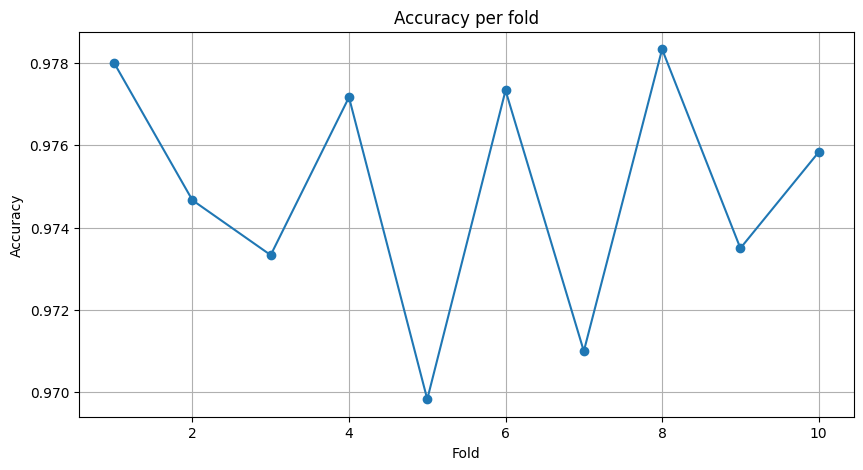

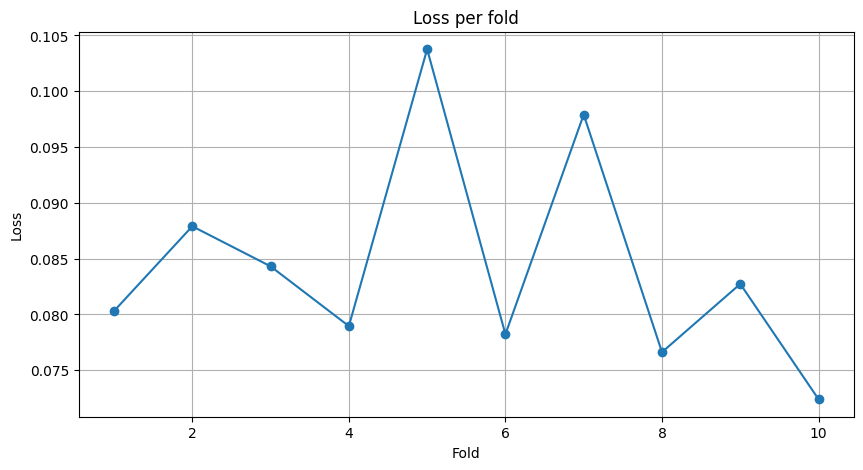

In [12]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_splits + 1), accuracy_per_fold, marker='o', linestyle='-')
plt.title('Accuracy per fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Vẽ biểu đồ Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_splits + 1), loss_per_fold, marker='o', linestyle='-')
plt.title('Loss per fold')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

**Sử	dụng	mô	hình	có	Accuracy	tốt	nhất giữa	các	fold trong	quá	trình	huấn luyện	và phân	lớp	cho	tập	test.**

Hướng	dẫn:
Sử	dụng argmax	của	thư	viện	numpy	để	chọn	ra	index có	accuracy lớn	nhất trong
accuracy_per_fold. Sau	đó	lấy	ra	models[index]

In [13]:
# Chọn index của fold có accuracy tốt nhất
best_fold_index = np.argmax(accuracy_per_fold)

# Lấy mô hình có accuracy tốt nhất
best_model = models[best_fold_index]

# Dự đoán phân lớp cho tập test
predictions = best_model.predict(test_images)

# Chọn lớp có xác suất cao nhất cho mỗi mẫu dữ liệu
predicted_labels = np.argmax(predictions, axis=1)

# Tính accuracy trên tập test
test_loss, test_accuracy = best_model.evaluate(test_images, test_labels, verbose=0)
print("Accuracy on test set:", test_accuracy)

313/313 [==============================] - 1s 2ms/step
Accuracy on test set: 0.978600025177002


**Tính	và	in	ra	Accuracy	của	mô	hình	trên	tập	test**

In [14]:
# Tính và in ra Accuracy của mô hình trên tập test
test_loss, test_accuracy = best_model.evaluate(test_images, test_labels, verbose=0)
print("Accuracy on test set:", test_accuracy)

Accuracy on test set: 0.978600025177002


**Tính	và	in	ra	Precision,	Recall,	F1-score	của	từng	lớp	và	trung	bình	của	mô	hình	trên	tập	test**

In [15]:
from sklearn.metrics import classification_report

# Dự đoán nhãn của tập test
predictions = best_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Tính và in ra classification report
print(classification_report(test_labels, predicted_labels))

313/313 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Hiển	thị	confusion	matrix	bằng	heat	map	(bản	đồ	nhiệt)**

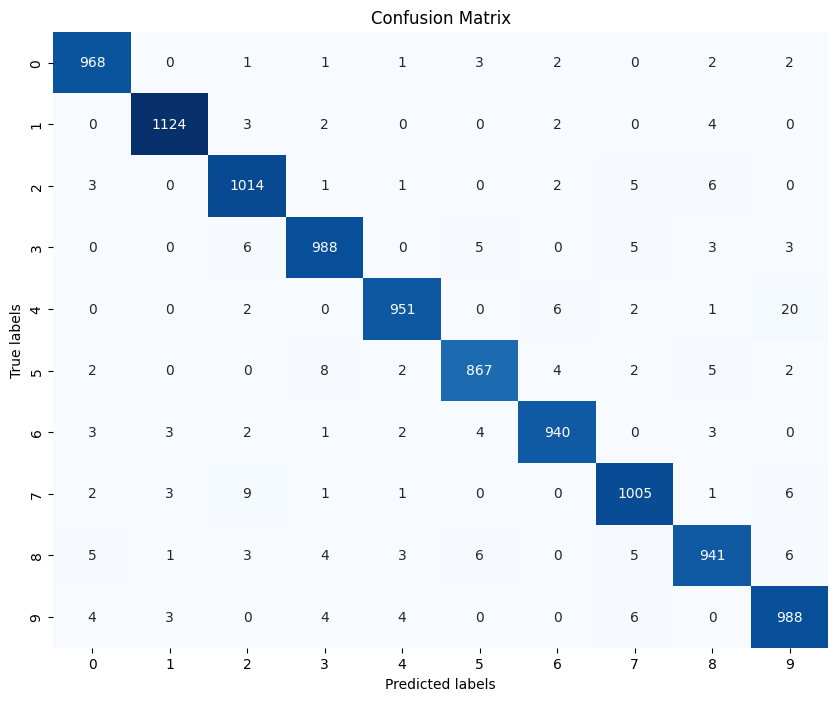

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tính ma trận nhầm lẫn
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


1/1 [==============================] - 0s 51ms/step
Predicted label for image 1 : 7


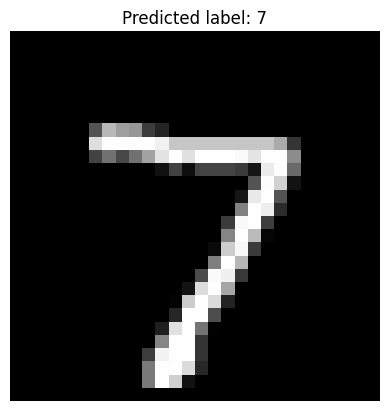

1/1 [==============================] - 0s 31ms/step
Predicted label for image 2 : 2


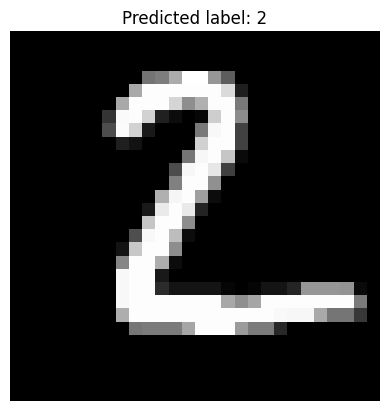

1/1 [==============================] - 0s 113ms/step
Predicted label for image 3 : 1


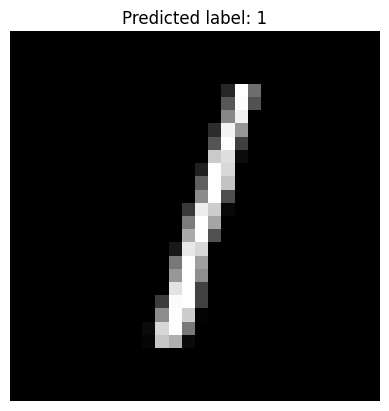

1/1 [==============================] - 0s 66ms/step
Predicted label for image 4 : 0


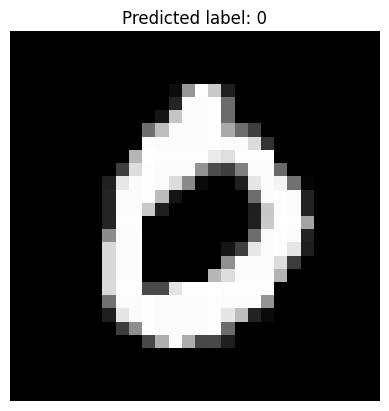

1/1 [==============================] - 0s 121ms/step
Predicted label for image 5 : 4


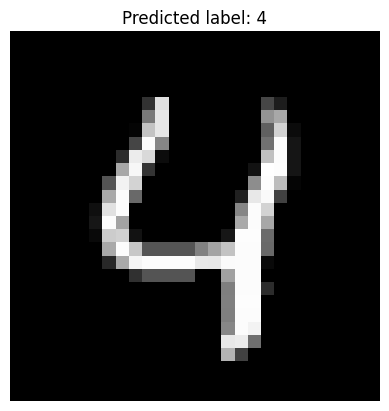

In [18]:
# Dự đoán nhãn cho 05 ảnh đầu tiên trong tập test
for i in range(5):
    # Lấy ảnh từ tập test
    image = test_images[i]
    # Mở rộng số chiều của ảnh
    image = np.expand_dims(image, axis=0)
    # Dự đoán nhãn của ảnh
    prediction = best_model.predict(image)
    # Chọn lớp có xác suất cao nhất
    predicted_label = np.argmax(prediction)
    # In ra kết quả
    print("Predicted label for image", i+1, ":", predicted_label)
# Hiển thị ảnh
    plt.figure()
    plt.imshow(test_images[i], cmap='gray')
    plt.title("Predicted label: " + str(predicted_label))
    plt.axis('off')
    plt.show()